In [2]:
df1=pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:

df3=df2.dropna()
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\sudha\AppData\Local\Temp\ipykernel_3192\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False;
    return True;


In [13]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [14]:
def covt(x):
    token=x.split('-')
    if len(token)==2:
        return ((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None


In [15]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(covt)

In [16]:
df4['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [18]:
df5=df4.copy()
df5['price_sqft']=df5['price']*1000/df5['total_sqft']

In [19]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000


In [20]:
df5['price']=df5['price']*1000

In [21]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values()

In [22]:
location_stats

location
 Anekal                                 1
Kengeri Satellite Town Stage II         1
Kirloskar layout, Basaveshwarnagar      1
Kodanda Reddy Layout                    1
Konappana Agrahara                      1
                                     ... 
Thanisandra                           233
Kanakpura Road                        266
Electronic City                       302
Sarjapur  Road                        392
Whitefield                            534
Name: location, Length: 1304, dtype: int64

In [23]:
other =location_stats[location_stats<=10]

In [24]:
other

location
 Anekal                                1
Kengeri Satellite Town Stage II        1
Kirloskar layout, Basaveshwarnagar     1
Kodanda Reddy Layout                   1
Konappana Agrahara                     1
                                      ..
Kalkere                               10
Dodsworth Layout                      10
BTM 1st Stage                         10
Nagappa Reddy Layout                  10
Ganga Nagar                           10
Name: location, Length: 1063, dtype: int64

In [25]:
location_stats

location
 Anekal                                 1
Kengeri Satellite Town Stage II         1
Kirloskar layout, Basaveshwarnagar      1
Kodanda Reddy Layout                    1
Konappana Agrahara                      1
                                     ... 
Thanisandra                           233
Kanakpura Road                        266
Electronic City                       302
Sarjapur  Road                        392
Whitefield                            534
Name: location, Length: 1304, dtype: int64

In [26]:
df5.location=df5.location.apply(lambda x: 'other' if x in other else x)

In [27]:
df5['location'].head(100)

0       Electronic City Phase II
1               Chikka Tirupathi
2                    Uttarahalli
3             Lingadheeranahalli
4                       Kothanur
                 ...            
97     Sarjapura - Attibele Road
98                         other
99                         other
100                 Yeshwanthpur
101                   Chandapura
Name: location, Length: 100, dtype: object

In [28]:
df5['location']=df4['location']

In [29]:
df5.location=df5.location.apply(lambda x:'other' if x in other else x)

In [30]:
df5

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39070.0,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120000.0,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62000.0,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95000.0,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51000.0,2,42.500000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231000.0,5,66.898349
13316,other,4 BHK,3600.0,5.0,400000.0,4,111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60000.0,2,52.585451
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488000.0,4,104.073363


In [31]:
df5.count().unique()

array([13246, 13200], dtype=int64)

In [32]:
len(df5.location.unique())

242

In [33]:
def custm(x):
    token=x.split(' ')
    if len(token)==2:
        return token[0]
    try:
        return int(token)
    except:
        return int(x)

In [34]:

df5.size

92722

In [35]:
df5['size']=df5['size'].apply(custm)

In [36]:
df5

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2,1056.0,2.0,39070.0,2,36.998106
1,Chikka Tirupathi,4,2600.0,5.0,120000.0,4,46.153846
2,Uttarahalli,3,1440.0,2.0,62000.0,3,43.055556
3,Lingadheeranahalli,3,1521.0,3.0,95000.0,3,62.458909
4,Kothanur,2,1200.0,2.0,51000.0,2,42.500000
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231000.0,5,66.898349
13316,other,4,3600.0,5.0,400000.0,4,111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60000.0,2,52.585451
13318,Padmanabhanagar,4,4689.0,4.0,488000.0,4,104.073363


In [37]:
df6=df5.copy()

In [38]:
df6

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2,1056.0,2.0,39070.0,2,36.998106
1,Chikka Tirupathi,4,2600.0,5.0,120000.0,4,46.153846
2,Uttarahalli,3,1440.0,2.0,62000.0,3,43.055556
3,Lingadheeranahalli,3,1521.0,3.0,95000.0,3,62.458909
4,Kothanur,2,1200.0,2.0,51000.0,2,42.500000
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231000.0,5,66.898349
13316,other,4,3600.0,5.0,400000.0,4,111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60000.0,2,52.585451
13318,Padmanabhanagar,4,4689.0,4.0,488000.0,4,104.073363


array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>],
       [<Axes: title={'center': 'price_sqft'}>, <Axes: >]], dtype=object)

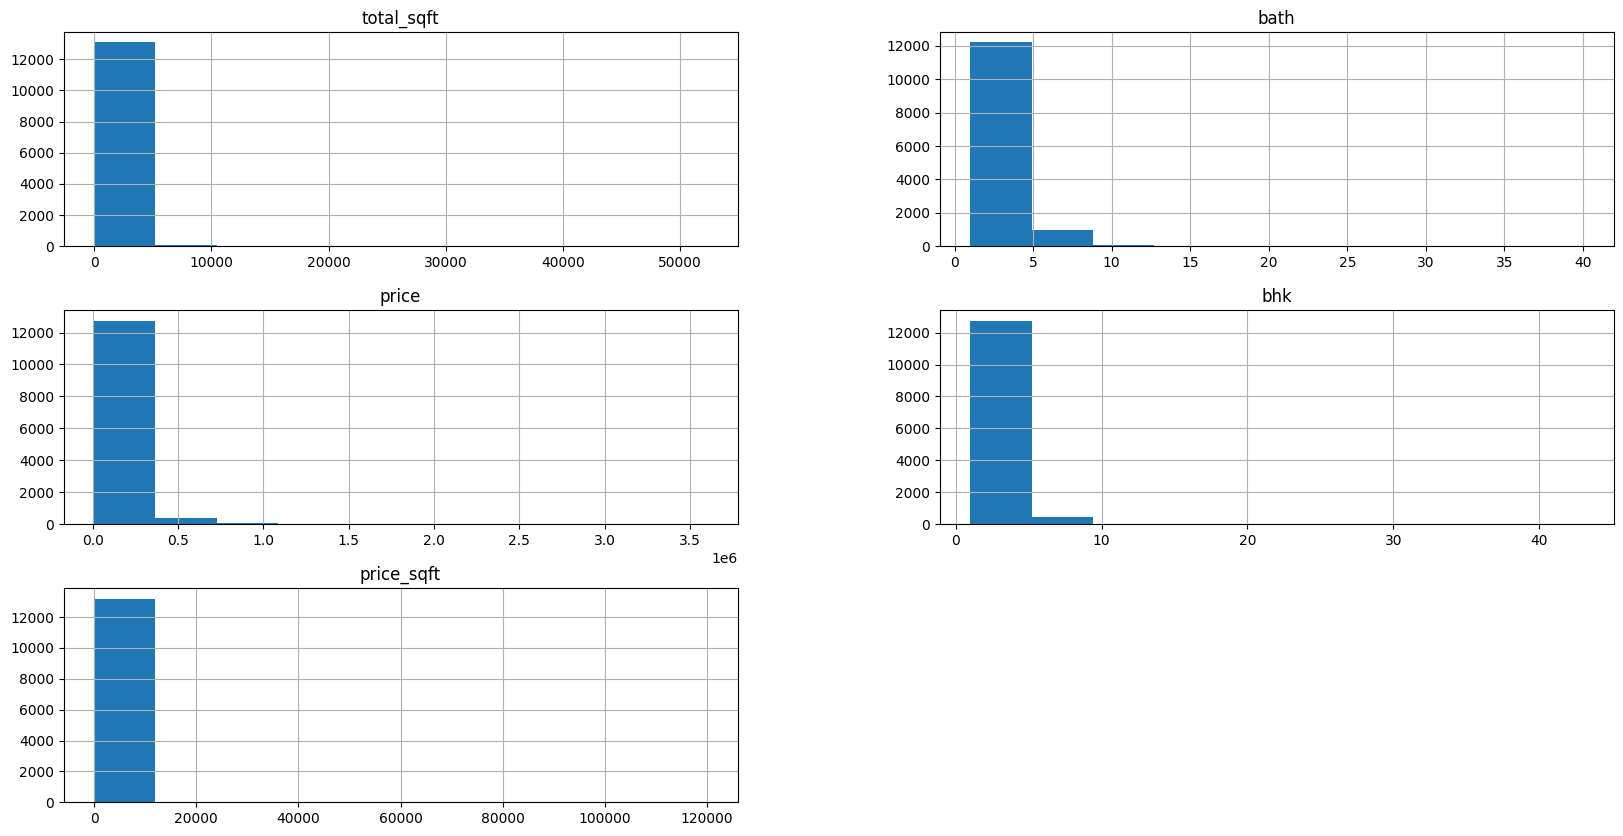

In [39]:
df6.hist()

Text(0, 0.5, 'count')

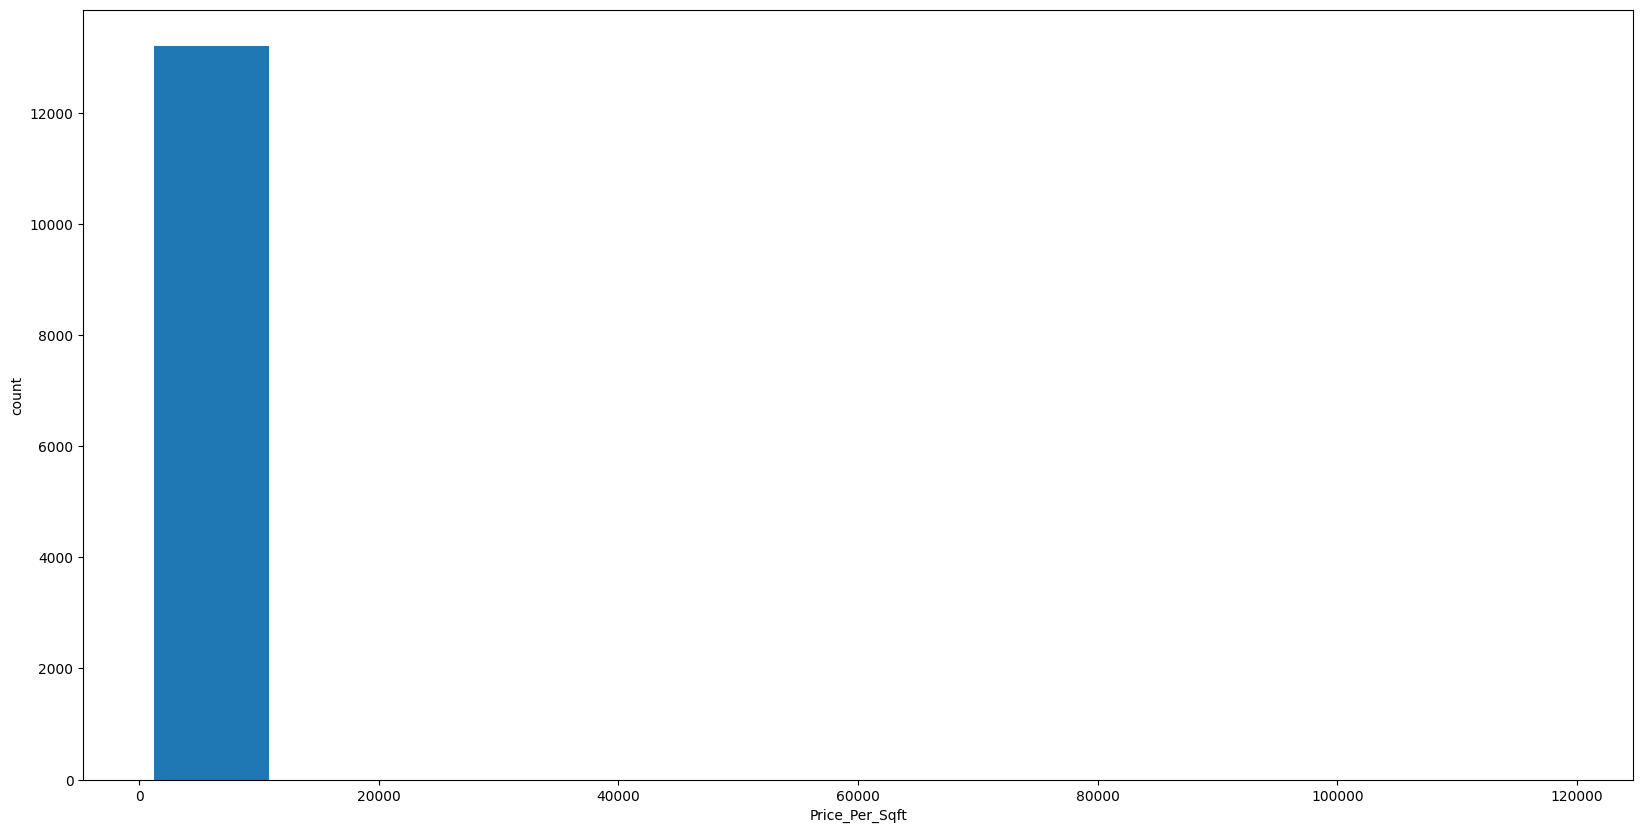

In [40]:
plt.hist(df6['price_sqft'],rwidth=0.8)
plt.xlabel('Price_Per_Sqft')
plt.ylabel('count')

In [41]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2,1056.0,2.0,39070.0,2,36.998106
1,Chikka Tirupathi,4,2600.0,5.0,120000.0,4,46.153846
2,Uttarahalli,3,1440.0,2.0,62000.0,3,43.055556
3,Lingadheeranahalli,3,1521.0,3.0,95000.0,3,62.458909
4,Kothanur,2,1200.0,2.0,51000.0,2,42.500000


In [42]:
dummy=pd.get_dummies(df5['location'])


In [43]:
dummy.drop('other',axis='columns')

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df5=df5.drop('location',axis='columns')

In [45]:
df5.join(dummy)


,size,total_sqft,bath,price,bhk,price_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2,1056.0,2.0,39070.0,2,36.998106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2600.0,5.0,120000.0,4,46.153846,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1440.0,2.0,62000.0,3,43.055556,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1521.0,3.0,95000.0,3,62.458909,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1200.0,2.0,51000.0,2,42.500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5,3453.0,4.0,231000.0,5,66.898349,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
13316,4,3600.0,5.0,400000.0,4,111.111111,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13317,2,1141.0,2.0,60000.0,2,52.585451,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4,4689.0,4.0,488000.0,4,104.073363,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [47]:
x=df5.drop(['price'],axis='columns')

In [48]:
y=df5.price

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [50]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [51]:
df5=df4.dropna()

In [52]:
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [53]:
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [54]:
df5=df5.drop(['size'],axis='columns')

In [55]:
df5

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [56]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [57]:
df6

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [58]:
dummy=pd.get_dummies(df6.location)

In [59]:
df6.join(dummy)

,location,total_sqft,bath,price,bhk,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,...,poornaprajna layout,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,singapura paradise,tc.palya,"white field,kadugodi",whitefiled
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13316,Richards Town,3600.0,5.0,400.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,Padmanabhanagar,4689.0,4.0,488.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df7=df6.drop(['location'],axis='columns')

In [61]:
df7

,total_sqft,bath,price,bhk
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2
...,...,...,...,...
13315,3453.0,4.0,231.00,5
13316,3600.0,5.0,400.00,4
13317,1141.0,2.0,60.00,2
13318,4689.0,4.0,488.00,4


In [62]:
df6

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [63]:
df8=pd.concat([df7,dummy],axis='columns')

In [64]:
df8

,total_sqft,bath,price,bhk,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,poornaprajna layout,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,singapura paradise,tc.palya,"white field,kadugodi",whitefiled
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,231.00,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13316,3600.0,5.0,400.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,1141.0,2.0,60.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4689.0,4.0,488.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
x=df8.drop('price',axis='columns')

In [66]:
y=df8.price

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

-5188400164929668.0

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([-6.35396715e+15, -3.95335965e+15,  4.69028875e-01,  4.37579250e-01,
        3.28022493e-01])

In [70]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
    return lr_clf.predict([X])[0]

In [71]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\sudha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75452423095703

In [72]:
predict_price('Indra Nagar',5000,5,5)

C:\Users\sudha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


465.68048095703125

In [73]:
import pickle
with open('bengaluru_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


In [74]:
import json
columns={ 'data_columns': [col.lower() for col  in x.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))